In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

In [3]:
(X_train,y_train),(X_test,y_test)=tf.keras.datasets.cifar10.load_data()

In [4]:
X_train.shape

(50000, 32, 32, 3)

In [6]:
X_train[0].shape

(32, 32, 3)

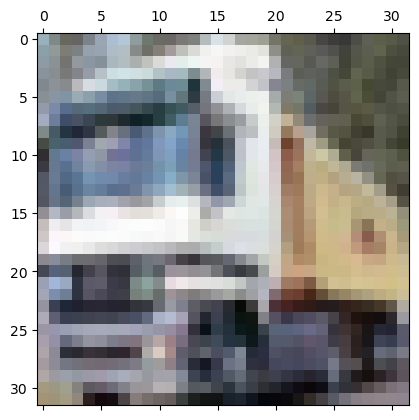

In [12]:
plt.matshow(X_train[1])

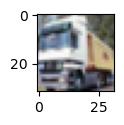

In [15]:
plt.figure(figsize=(10,1))
plt.imshow(X_train[1])

In [9]:
#9 is truck
y_train[1]

array([9], dtype=uint8)

In [16]:
classes=['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

In [17]:
y_train[1]

array([9], dtype=uint8)

In [20]:
classes[y_train[1][0]]

'truck'

Scaling images

In [21]:
X_train_scaled=X_train/255
X_test_scaled=X_test/255

In [25]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [23]:
#performing one hot encoding
y_train_categorical=keras.utils.to_categorical(y_train,num_classes=10,dtype='float32')


In [24]:
y_train_categorical[:5]

array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [26]:
y_test_categorical=keras.utils.to_categorical(y_test,num_classes=10,dtype='float32')


## Simple Neural Network

In [31]:
model=keras.Sequential([
    keras.layers.Flatten(input_shape=(32,32,3)),
    keras.layers.Dense(3000,activation='relu'),
    keras.layers.Dense(1000,activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')
           
])
model.compile(optimizer='SGD',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

model.fit(X_train_scaled,y_train_categorical,epochs=10)

Epoch 1/10
1563/1563 [==============================] - 34s 22ms/step - loss: 1.8134 - accuracy: 0.3532
Epoch 2/10
1563/1563 [==============================] - 34s 22ms/step - loss: 1.6221 - accuracy: 0.4268
Epoch 3/10
1563/1563 [==============================] - 34s 22ms/step - loss: 1.5391 - accuracy: 0.4586
Epoch 4/10
1563/1563 [==============================] - 34s 22ms/step - loss: 1.4803 - accuracy: 0.4785
Epoch 5/10
1563/1563 [==============================] - 35s 22ms/step - loss: 1.4283 - accuracy: 0.4961
Epoch 6/10
1563/1563 [==============================] - 34s 22ms/step - loss: 1.3875 - accuracy: 0.5113
Epoch 7/10
1563/1563 [==============================] - 34s 22ms/step - loss: 1.3519 - accuracy: 0.5240
Epoch 8/10
1563/1563 [==============================] - 34s 22ms/step - loss: 1.3141 - accuracy: 0.5369
Epoch 9/10
1563/1563 [==============================] - 34s 22ms/step - loss: 1.2814 - accuracy: 0.5497
Epoch 10/10
1563/1563 [==============================] - 36s 23m

In [32]:
classes[np.argmax(model.predict(X_test_scaled)[0])]

313/313 [==============================] - 3s 11ms/step


'cat'

In [33]:
classes[y_test[0][0]]

'cat'

In [34]:
#model accuracy
model.evaluate(X_test_scaled,y_test_categorical)

313/313 [==============================] - 4s 11ms/step - loss: 1.3392 - accuracy: 0.5283


[1.3392150402069092, 0.5282999873161316]